# Final Project - Connect 4

Joseph Larson, Joel Kraft, Spencer Lofing

In [52]:
import copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

state = [['R', 'B', 'R', 'B', 'R', 'B'], [], ['B'], [], [], [], []]

def printState(state):
    copystate = copy.deepcopy(state)
    for slot in copystate:
        slotlength = len(slot)
        for i in range(0, 6 - slotlength):
            slot.insert(0, 'X')

    for i in range(0, 6):
        for slot in copystate:
            print(slot[i] + ' '),
        print()

def validMoves(state):
    listOfMoves = []
    for i in range(0, len(state)):
        if len(state[i]) < 6:
            listOfMoves.append(i)
    return listOfMoves

def makeMove(state, move, color):
    copystate = copy.deepcopy(state)
    copystate[move].insert(0, color)
    return copystate
    
def reachedGoalState(state):
    #Fill all slots for computation
    copystate = copy.deepcopy(state)
    for slot in copystate:
        slotlength = len(slot)
        for i in range(0, 6 - slotlength):
            slot.insert(0, 'X')

    #Vertical checks
    for slot in copystate:
        for i in range(0,3):
            if (slot[i] == slot[i+1]) & (slot[i] == slot[i+2]) & (slot[i] == slot[i+3]) & (slot[i] != 'X'):
                return 1

    #Horizontal checks
    for j in range(0,4):
        for i in range(0,len(copystate[0])):
            if (copystate[j][i] == copystate[j+1][i]) & (copystate[j][i] == copystate[j+2][i]) & \
                    (copystate[j][i] == copystate[j+3][i]) & (copystate[j][i] != 'X'):
                return 1

    #Diaganol up-right
    for i in range(0,4): #row
        for j in range(3,6): #column
            if (copystate[i][j] == copystate[i+1][j-1]) & (copystate[i][j] == copystate[i+2][j-2]) & \
                    (copystate[i][j] == copystate[i+3][j-3]) & (copystate[i][j] != 'X'):
                return 1

    # Diaganol up-left
    for i in range(0, 4):  # row
        for j in range(0, 3):  # column
            if (copystate[i][j] == copystate[i + 1][j + 1]) & (copystate[i][j] == copystate[i + 2][j + 2]) & \
                    (copystate[i][j] == copystate[i + 3][j + 3]) & (copystate[i][j] != 'X'):
                return 1
    #not a goal state
    return 0

In [53]:
printState(state)

R 
X 
X 
X 
X 
X 
X 

B 
X 
X 
X 
X 
X 
X 

R 
X 
X 
X 
X 
X 
X 

B 
X 
X 
X 
X 
X 
X 

R 
X 
X 
X 
X 
X 
X 

B 
X 
B 
X 
X 
X 
X 



In [2]:
def stateMoveTuple(state, move, color) :
    return ((tuple(state[0]), tuple(state[1]), tuple(state[2]), tuple(state[3]), tuple(state[4]), tuple(state[5]), tuple(state[6])), move, color)

In [3]:
stateMoveTuple(state, 3, 'R')

((('R', 'B', 'R', 'B', 'R', 'B'), (), ('B',), (), (), (), ()), 3, 'R')

In [4]:
validMoves(state)

[1, 2, 3, 4, 5, 6]

In [5]:
makeMove(state, 1, "R")

In [6]:
state

[['R', 'B', 'R', 'B', 'R', 'B'], ['R'], ['B'], [], [], [], []]

In [19]:
def trainQ(nRepetitions, learningRate, epsilonDecayFactor, validMovesF, makeMoveF, startState = [[], [], [], [], [], [], []]) :
    epsilon = 1.0
    Q = {}
    steps = []
    
    for repetition in range(nRepetitions):
        epsilon *= epsilonDecayFactor
        step = 0
        state =  startState
        done = False
        while not done:
            #Blue's turn
            step += 1
            move = epsilonGreedy(epsilon, Q, state, validMovesF)
            stateNew = makeMove(state, move, 'B')
            if stateMoveTuple(state,move, 'B') not in Q:
                Q[stateMoveTuple(state,move, 'B')] = -1  # initial Q value for new board,move

            if reachedGoalState(stateNew):
                # solved!
                Q[stateMoveTuple(state,move, 'B')] = 0
                done = True
                
            elif len(validMovesF(stateNew)) is 0 : 
                done = True
                Q[stateMoveTuple(state,move, 'B')] = -1
                
            else : 
                # Red's turn
                validRedMoves = validMovesF(stateNew)
                moveO = validRedMoves[np.random.choice(len(validRedMoves))]
                makeMoveF(state, moveO, 'R')
                if reachedGoalState(stateNew):
                    # solved for Red
                    Q[stateMoveTuple(state,move, 'B')] += rho * (-1 - Q[stateMoveTuple(state,move, 'B')])
                    done = True
                
            if step > 1:
                Q[stateMoveTuple(stateOld,moveOld, 'B')] += learningRate * (-1 + Q[stateMoveTuple(state,move, 'B')] - Q[stateMoveTuple(stateOld,moveOld, 'B')])

            stateOld, moveOld = state, move # remember board and move to Q(board,move) can be updated after next steps
            state = stateNew
        steps.append(step)
    return Q, np.array(steps)

In [21]:
def epsilonGreedy(epsilon, Q, state, validMovesF):
    validMoves = validMovesF(state)
    if np.random.uniform() < epsilon:
        # Random Move
        return validMoves[np.random.choice(len(validMoves))]
    else:
        # Greedy Move
        Qs = np.array([Q.get(stateMoveTuple(state, m, 'B'), 0) for m in validMoves]) 
        return validMoves[ np.argmax(Qs) ]

In [43]:
def testQ(Q, maxSteps, validMovesF, makeMoveF, startState = [[], [], [], [], [], [], []]) : 
    state = startState
    listOfStates = []

    for steps in range(maxSteps) : 
        listOfStates.append(state)
        move = epsilonGreedy(0, Q, state, validMovesF)
        stateNew = makeMoveF(state, move, 'B')
        state = stateNew
        if reachedGoalState(stateNew) :
            listOfStates.append(stateNew)
            return listOfStates
        
        validRedMoves = validMovesF(stateNew)
        moveRed = validRedMoves[np.random.choice(len(validRedMoves))]
        statePostRed = makeMoveF(state, moveRed, 'R')
        state = statePostRed
        if reachedGoalState(stateNew):
            return listOfStates
    return []

In [11]:
reachedGoalState(state)

0

In [26]:
Q, stepsToGoal = trainQ(1000, 0.5, 0.7, validMoves, makeMove)

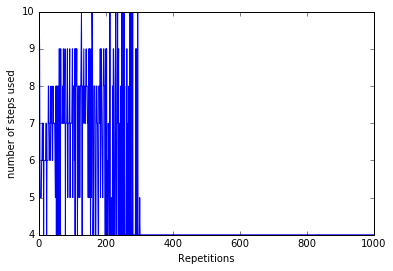

In [27]:
plt.plot(stepsToGoal)
plt.ylabel('number of steps used')
plt.xlabel('Repetitions')
plt.show()

In [44]:
path = testQ(Q, 20, validMoves, makeMove)

In [45]:
for s in path:
    printState(s)
    print()

[[], [], [], [], [], [], []]
X 
X 
X 
X 
X 
X 
X 

X 
X 
X 
X 
X 
X 
X 

X 
X 
X 
X 
X 
X 
X 

X 
X 
X 
X 
X 
X 
X 

X 
X 
X 
X 
X 
X 
X 

X 
X 
X 
X 
X 
X 
X 


[[], ['R'], ['B'], [], [], [], []]
X 
X 
X 
X 
X 
X 
X 

X 
X 
X 
X 
X 
X 
X 

X 
X 
X 
X 
X 
X 
X 

X 
X 
X 
X 
X 
X 
X 

X 
X 
X 
X 
X 
X 
X 

X 
R 
B 
X 
X 
X 
X 


[['B'], ['R', 'R'], ['B'], [], [], [], []]
X 
X 
X 
X 
X 
X 
X 

X 
X 
X 
X 
X 
X 
X 

X 
X 
X 
X 
X 
X 
X 

X 
X 
X 
X 
X 
X 
X 

X 
R 
X 
X 
X 
X 
X 

B 
R 
B 
X 
X 
X 
X 


[['R', 'B', 'B'], ['R', 'R'], ['B'], [], [], [], []]
X 
X 
X 
X 
X 
X 
X 

X 
X 
X 
X 
X 
X 
X 

X 
X 
X 
X 
X 
X 
X 

R 
X 
X 
X 
X 
X 
X 

B 
R 
X 
X 
X 
X 
X 

B 
R 
B 
X 
X 
X 
X 


[['B', 'R', 'B', 'B'], ['R', 'R'], ['R', 'B'], [], [], [], []]
X 
X 
X 
X 
X 
X 
X 

X 
X 
X 
X 
X 
X 
X 

B 
X 
X 
X 
X 
X 
X 

R 
X 
X 
X 
X 
X 
X 

B 
R 
R 
X 
X 
X 
X 

B 
R 
B 
X 
X 
X 
X 


[['B', 'B', 'R', 'B', 'B'], ['R', 'R'], ['R', 'B'], [], [], ['R'], []]
X 
X 
X 
X 
X 
X 
X 

B 
X 
X 
X 
X 
X 
X